## 1. PROYECTO MACHINE LEARNING
#### NFL BET PREDICTION

In [1]:
from utils.libreries import *

In [2]:
file_path = "data/raw/spreadspoke_scores.csv"

#Hacemos la llamada a nuestro DF
scores = pd.read_csv(file_path)
scores.head(5)

schedule_date  schedule_season schedule_week  schedule_playoff  \
0      9/2/1966             1966             1             False   
1      9/3/1966             1966             1             False   
2      9/4/1966             1966             1             False   
3      9/9/1966             1966             2             False   
4     9/10/1966             1966             1             False   

            team_home  score_home  score_away        team_away  \
0      Miami Dolphins          14          23  Oakland Raiders   
1      Houston Oilers          45           7   Denver Broncos   
2  San Diego Chargers          27           7    Buffalo Bills   
3      Miami Dolphins          14          19    New York Jets   
4   Green Bay Packers          24           3  Baltimore Colts   

  team_favorite_id  spread_favorite over_under_line         stadium  \
0              NaN              NaN             NaN     Orange Bowl   
1              NaN              NaN             NaN    Rice Stadium   
2              NaN              NaN             NaN  Balboa Stadium   
3              NaN              NaN             NaN     Orange Bowl   
4              NaN              NaN             NaN   Lambeau Field   

   stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity  \
0            False                 83.0               6.0              71.0   
1            False                 81.0               7.0              70.0   
2            False                 70.0               7.0              82.0   
3            False                 82.0              11.0              78.0   
4            False                 64.0               8.0              62.0   

  weather_detail  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [3]:
scores.describe().T

count         mean        std     min     25%     50%  \
schedule_season      13516.0  1996.082939  16.144258  1966.0  1983.0  1997.0   
score_home           13516.0    22.461897  10.526423     0.0    15.0    22.0   
score_away           13516.0    19.784848  10.165222     0.0    13.0    20.0   
spread_favorite      11037.0    -5.385204   3.439617   -26.5    -7.0    -4.5   
weather_temperature  12309.0    58.833211  15.538656    -6.0    48.0    62.0   
weather_wind_mph     12293.0     7.689010   5.694124     0.0     3.0     8.0   
weather_humidity      8468.0    67.212801  15.796414     4.0    57.0    69.0   

                        75%     max  
schedule_season      2010.0  2022.0  
score_home             29.0    72.0  
score_away             27.0    62.0  
spread_favorite        -3.0     0.0  
weather_temperature    72.0    97.0  
weather_wind_mph       11.0    40.0  
weather_humidity       79.0   100.0

In [4]:
scores.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1207
weather_wind_mph        1223
weather_humidity        5048
weather_detail         10597
dtype: int64

In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

### 2. DATA PROCESSING

Después de cargar nuestros datos en crudo procedemos a trabajar sobre ellos.

In [6]:
#Nos quedamos solo con la temporada regular. Procedemos a eliminar los playoffs
scores = scores[scores['schedule_playoff'] == 0]
scores = scores.loc[scores['schedule_season'] >= 1980]

In [7]:
#Establecemos como punto de partida la temporada 1980.
# scores = scores.loc[scores['schedule_season'] >= 1980]

In [8]:
#Cambiamos el formato de las columnas para que sean numéricas
scores = scores.astype({'schedule_playoff': int,
                        'schedule_week': int,
                        'over_under_line': float
                        })

In [9]:
#Eliminamos los NANs de las columnas debido su antiguedad y que pueden ser irrelevantes
scores.isnull().sum()

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     692
weather_wind_mph        691
weather_humidity       4188
weather_detail         7690
dtype: int64

In [10]:
# Eliminamos las columnas que no nos interesan debido a alto numero de NANs "weather_detail", "weather_humidity"
# Eliminamos la columna "schedule_playoff" que no nos interesa 

scores = scores.drop(columns=["schedule_playoff","weather_detail", "stadium_neutral"])

In [11]:
#Tratamos los Nans de nuestras columnas. Para la columna "weather_temperature" utizamos media al ser simitrica su distrubucion.
# Para la columna "weather_humidity" la media debido a que tiende a ser una distrubucion logaritmica.
scores = scores.fillna({'weather_temperature': scores['weather_temperature'].median(),
                        'weather_wind_mph': (scores['weather_wind_mph'].median())})


In [12]:
scores = scores.reset_index(drop=True)

### 3. FEATURES

In [13]:
# Calcula la diferencia de puntajes entre el equipo local y visitante
scores['score_diff'] = scores['score_home'] - scores['score_away']

In [14]:
scores['total_points'] = scores['score_home'] + scores['score_away']

In [15]:
scores["result"] = (scores["score_home"] >= scores["score_away"]).astype(int)

In [16]:
scores

schedule_date  schedule_season  schedule_week              team_home  \
0          9/7/1980             1980              1          Buffalo Bills   
1          9/7/1980             1980              1     Cincinnati Bengals   
2          9/7/1980             1980              1      Green Bay Packers   
3          9/7/1980             1980              1     Kansas City Chiefs   
4          9/7/1980             1980              1       Los Angeles Rams   
...             ...              ...            ...                    ...   
10312      1/8/2023             2022             18    Philadelphia Eagles   
10313      1/8/2023             2022             18    Pittsburgh Steelers   
10314      1/8/2023             2022             18    San Francisco 49ers   
10315      1/8/2023             2022             18       Seattle Seahawks   
10316      1/8/2023             2022             18  Washington Commanders   

       score_home  score_away             team_away team_favorite_id  \
0              17           7        Miami Dolphins              MIA   
1              12          17  Tampa Bay Buccaneers               TB   
2              12           6         Chicago Bears              CHI   
3              14          27       Oakland Raiders               KC   
4              20          41         Detroit Lions              LAR   
...           ...         ...                   ...              ...   
10312          22          16       New York Giants              PHI   
10313          28          14      Cleveland Browns              PIT   
10314          38          13     Arizona Cardinals               SF   
10315          19          16      Los Angeles Rams              SEA   
10316          26           6        Dallas Cowboys              DAL   

       spread_favorite  over_under_line                  stadium  \
0                 -3.0             35.0     Ralph Wilson Stadium   
1                 -1.0             34.0            Cinergy Field   
2                 -6.0             35.0            Lambeau Field   
3                 -3.0             42.0        Arrowhead Stadium   
4                 -9.0             38.0          Anaheim Stadium   
...                ...              ...                      ...   
10312            -17.0             43.0  Lincoln Financial Field   
10313             -2.5             40.0         Acrisure Stadium   
10314            -14.5             40.0           Levi's Stadium   
10315             -4.5             43.0              Lumen Field   
10316             -7.5             41.0              FedEx Field   

       weather_temperature  weather_wind_mph  weather_humidity  score_diff  \
0                     64.0               8.0              66.0          10   
1                     72.0               9.0              81.0          -5   
2                     65.0               5.0              77.0           6   
3                     82.0              10.0              58.0         -13   
4                     66.0              11.0              70.0         -21   
...                    ...               ...               ...         ...   
10312                 64.0               7.0               NaN           6   
10313                 64.0               7.0               NaN          14   
10314                 64.0               7.0               NaN          25   
10315                 64.0               7.0               NaN           3   
10316                 64.0               7.0               NaN          20   

       total_points  result  
0                24       1  
1                29       0  
2                18       1  
3                41       0  
4                61       0  
...             ...     ...  
10312            38       1  
10313            42       1  
10314            51       1  
10315            35       1  
10316            32       1  

[10317 rows x 17 columns]

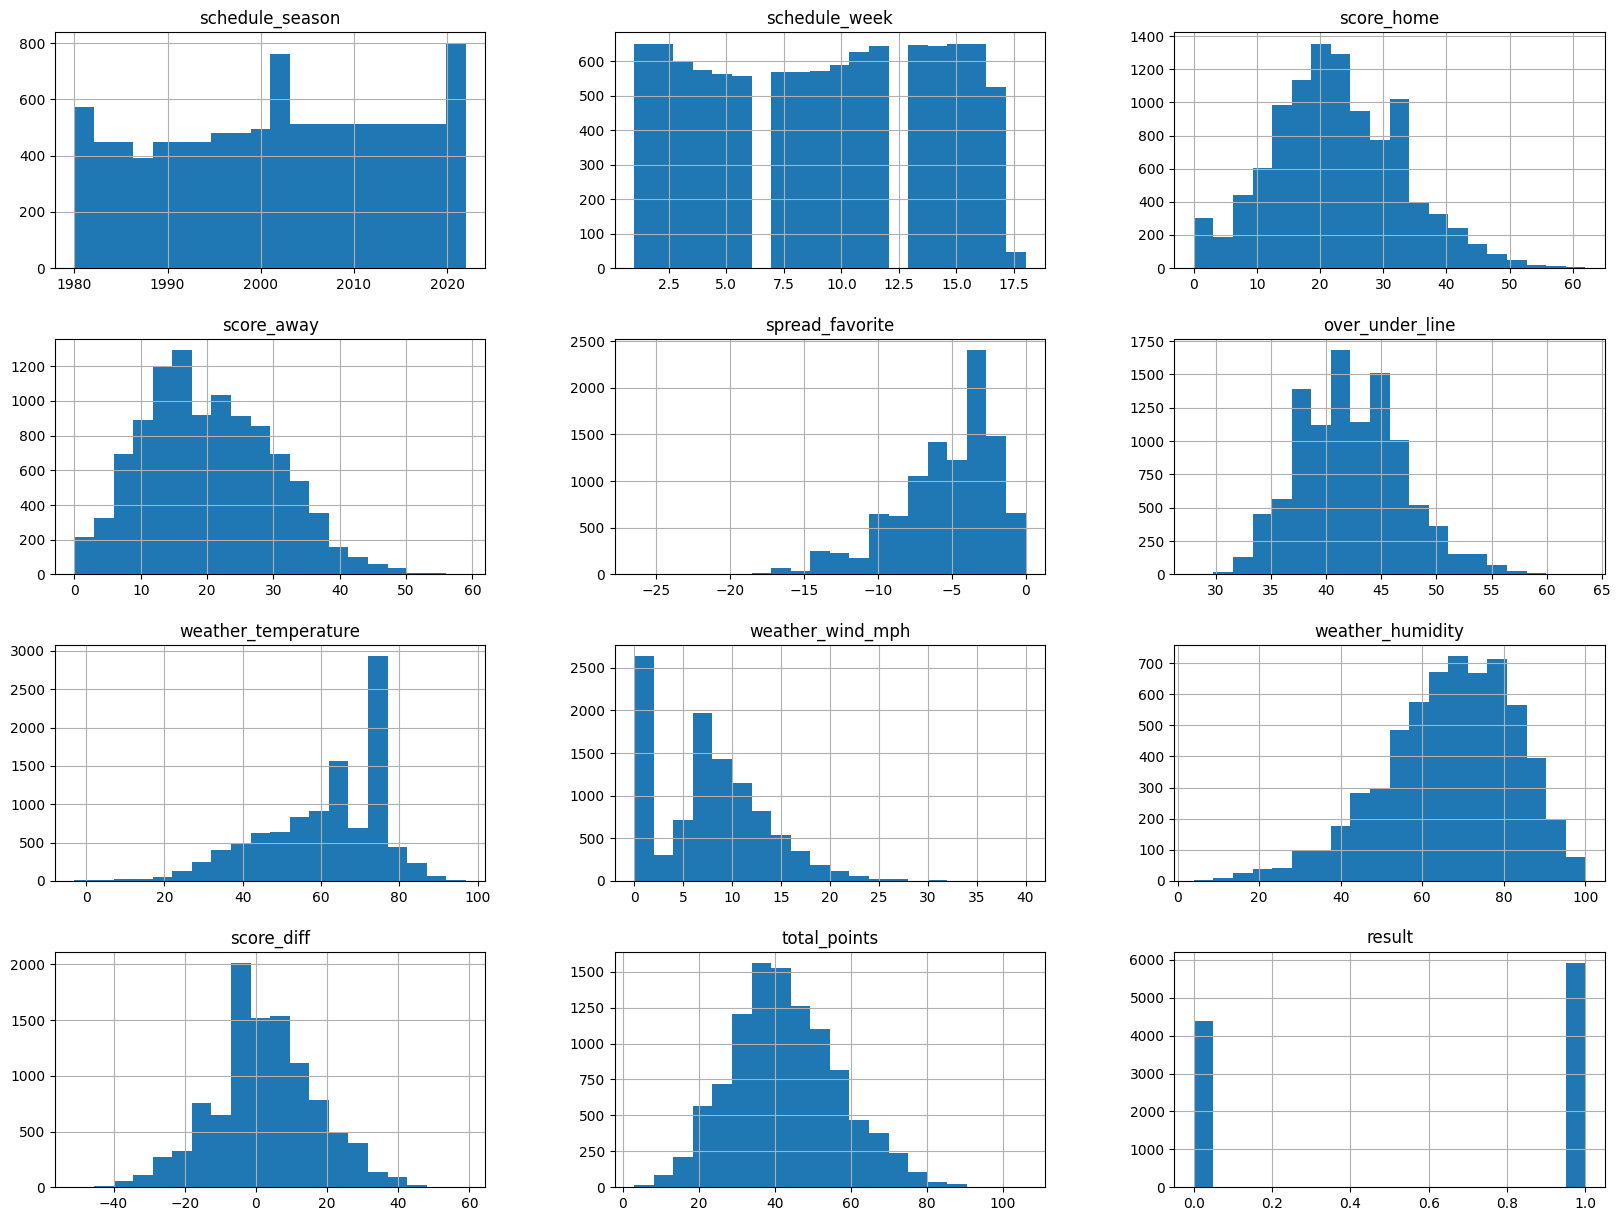

In [17]:
scores.hist(bins=20, figsize=(20,15));

In [18]:
scores = scores.fillna(0)
scores.schedule_season = scores.schedule_season-2000
scores['weather_humidity'] = pd.to_numeric(scores['weather_humidity'])

In [19]:
scores = scores.astype({
                        "team_home":"category",
                        "team_away":"category",
                        "team_favorite_id":"category",
                        "stadium":"category",
                        })

In [20]:
scores.team_home.replace({"Washington Redskins":"WAS",
                                 "Washington Football Team":"WAS",
                                 "Washington Commanders":"WAS",
                                 "San Diego Chargers":"LAC",
                                 "Los Angeles Chargers":"LAC",
                                 "Los Angeles Raiders":"LVR",
                                 "Las Vegas Raiders":"LVR",
                                 "Oakland Raiders":"LVR",
                                 "Tennessee Oilers":"TEN",
                                 "Houston Oilers": "TEN",
                                 "Tennessee Titans":"TEN",
                                 "Phoenix Cardinals":"LAR",
                                 "St. Louis Rams":"LAR",
                                 "Los Angeles Rams":"LAR",
                                 "St. Louis Cardinals": "ARI",
                                 "Arizona Cardinals":"ARI",
                                 "Baltimore Colts":"IND",
                                 "Indianapolis Colts":"IND",
                                 "Houston Texans":"HOU",
                                 "Baltimore Ravens":"BAL",
                                 "Carolina Panthers":"CAR",
                                 "Jacksonville Jaguars":"JAX",
                                 "Cleveland Browns":"CLE",
                                 "Cincinnati Bengals":"CIN",
                                 "Chicago Bears":"CHI",
                                 "Dallas Cowboys":"DAL",
                                 "Detroit Lions":"DET",
                                 "Green Bay Packers":"GB",
                                 "Kansas City Chiefs":"KC",
                                 "Miami Dolphins":"MIA",
                                 "Pittsburgh Steelers":"PIT",
                                 "Tampa Bay Buccaneers":"TB",
                                 "New York Jets":"NYJ",
                                 "Atlanta Falcons":"ATL",
                                 "New Orleans Saints":"NO",
                                 "New England Patriots":"NE",
                                 "Denver Broncos":"DEN",
                                 "San Francisco 49ers":"SF",
                                 "Seattle Seahawks":"SEA",
                                 "Buffalo Bills":"BUF",
                                 "New York Giants":"NYG",
                                 "Minnesota Vikings":"MIN",
                                 "Philadelphia Eagles":"PHI"}, inplace=True)

In [21]:
scores.team_away.replace({"Washington Redskins":"WAS",
                                 "Washington Football Team":"WAS",
                                 "Washington Commanders":"WAS",
                                 "San Diego Chargers":"LAC",
                                 "Los Angeles Chargers":"LAC",
                                 "Los Angeles Raiders":"LVR",
                                 "Las Vegas Raiders":"LVR",
                                 "Oakland Raiders":"LVR",
                                 "Tennessee Oilers":"TEN",
                                 "Houston Oilers": "TEN",
                                 "Tennessee Titans":"TEN",
                                 "Phoenix Cardinals":"LAR",
                                 "St. Louis Rams":"LAR",
                                 "Los Angeles Rams":"LAR",
                                 "St. Louis Cardinals": "ARI",
                                 "Arizona Cardinals":"ARI",
                                 "Baltimore Colts":"IND",
                                 "Indianapolis Colts":"IND",
                                 "Houston Texans":"HOU",
                                 "Baltimore Ravens":"BAL",
                                 "Carolina Panthers":"CAR",
                                 "Jacksonville Jaguars":"JAX",
                                 "Cleveland Browns":"CLE",
                                 "Cincinnati Bengals":"CIN",
                                 "Chicago Bears":"CHI",
                                 "Dallas Cowboys":"DAL",
                                 "Detroit Lions":"DET",
                                 "Green Bay Packers":"GB",
                                 "Kansas City Chiefs":"KC",
                                 "Miami Dolphins":"MIA",
                                 "Pittsburgh Steelers":"PIT",
                                 "Tampa Bay Buccaneers":"TB",
                                 "New York Jets":"NYJ",
                                 "Atlanta Falcons":"ATL",
                                 "New Orleans Saints":"NO",
                                 "New England Patriots":"NE",
                                 "Denver Broncos":"DEN",
                                 "San Francisco 49ers":"SF",
                                 "Seattle Seahawks":"SEA",
                                 "Buffalo Bills":"BUF",
                                 "New York Giants":"NYG",
                                 "Minnesota Vikings":"MIN",
                                 "Philadelphia Eagles":"PHI"}, inplace=True)

In [22]:
# fav_home = scores['team_home']

# # Crea una instancia del LabelEncoder
# encoder = LabelEncoder()

# # Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
# fav_home = encoder.fit_transform(fav_home)

# # Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
# scores['team_home_encoded'] = fav_home

In [23]:
# etiquetas_originales = encoder.inverse_transform(scores['team_home_encoded'])

# # Asigna las etiquetas originales a una nueva columna "team_home_decoded" en el DataFrame
# scores['team_home_decoded'] = etiquetas_originales

# # Imprime el DataFrame para ver los resultados
# correspondiente = scores[["team_home_encoded", "team_home_decoded"]]
# correspondiente

In [24]:
# fav_away = scores['team_away']

# # Crea una instancia del LabelEncoder
# encoder = LabelEncoder()

# # Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
# fav_away = encoder.fit_transform(fav_away)

# # Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
# scores['team_away_encoded'] = fav_away

In [25]:
# etiquetas_originales = encoder.inverse_transform(scores['team_away_encoded'])

# # Asigna las etiquetas originales a una nueva columna "team_home_decoded" en el DataFrame
# scores['team_home_decoded'] = etiquetas_originales

# # Imprime el DataFrame para ver los resultados
# correspondiente_1 = scores[["team_away_encoded", "team_home_decoded"]]
# correspondiente_1

In [26]:
# scores['team_favorite_id'].replace("PICK", np.nan, inplace=True)
# scores['team_favorite_id'].dropna(inplace=True)

In [27]:
# favs = scores['team_favorite_id']

# # Crea una instancia del LabelEncoder
# encoder = LabelEncoder()

# # Ajusta y transforma los datos de los estadios utilizando el LabelEncoder
# team_favorite_id_encoded = encoder.fit_transform(favs)

# # Asigna los datos codificados a una nueva columna "stadium_encoded" en el DataFrame
# scores['team_favorite_id_encoded'] = team_favorite_id_encoded

In [28]:
def encode_teams(data_frame, columns):
    # Apply One-Hot Encoding for each team column and add the encoded columns to the original DataFrame
    for column in columns:
        encoded_data = pd.get_dummies(data_frame[column], prefix=column)
        data_frame = pd.concat([data_frame, encoded_data], axis=1)
        data_frame.drop(columns=column, inplace=True)

    # Return the DataFrame with the encoded columns added
    return data_frame

In [29]:
scores = encode_teams(scores, ["stadium","team_home", "team_away", "team_favorite_id"])

In [30]:
scores

schedule_date  schedule_season  schedule_week  score_home  score_away  \
0          9/7/1980              -20              1          17           7   
1          9/7/1980              -20              1          12          17   
2          9/7/1980              -20              1          12           6   
3          9/7/1980              -20              1          14          27   
4          9/7/1980              -20              1          20          41   
...             ...              ...            ...         ...         ...   
10312      1/8/2023               22             18          22          16   
10313      1/8/2023               22             18          28          14   
10314      1/8/2023               22             18          38          13   
10315      1/8/2023               22             18          19          16   
10316      1/8/2023               22             18          26           6   

       spread_favorite  over_under_line  weather_temperature  \
0                 -3.0             35.0                 64.0   
1                 -1.0             34.0                 72.0   
2                 -6.0             35.0                 65.0   
3                 -3.0             42.0                 82.0   
4                 -9.0             38.0                 66.0   
...                ...              ...                  ...   
10312            -17.0             43.0                 64.0   
10313             -2.5             40.0                 64.0   
10314            -14.5             40.0                 64.0   
10315             -4.5             43.0                 64.0   
10316             -7.5             41.0                 64.0   

       weather_wind_mph  weather_humidity  ...  team_favorite_id_NYG  \
0                   8.0              66.0  ...                     0   
1                   9.0              81.0  ...                     0   
2                   5.0              77.0  ...                     0   
3                  10.0              58.0  ...                     0   
4                  11.0              70.0  ...                     0   
...                 ...               ...  ...                   ...   
10312               7.0               0.0  ...                     0   
10313               7.0               0.0  ...                     0   
10314               7.0               0.0  ...                     0   
10315               7.0               0.0  ...                     0   
10316               7.0               0.0  ...                     0   

       team_favorite_id_NYJ  team_favorite_id_PHI  team_favorite_id_PICK  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      0   
3                         0                     0                      0   
4                         0                     0                      0   
...                     ...                   ...                    ...   
10312                     0                     1                      0   
10313                     0                     0                      0   
10314                     0                     0                      0   
10315                     0                     0                      0   
10316                     0                     0                      0   

       team_favorite_id_PIT  team_favorite_id_SEA  team_favorite_id_SF  \
0                         0                     0                    0   
1                         0                     0                    0   
2                         0                     0                    0   
3                         0                     0                    0   
4                         0                     0                    0   
...                     ...                   ...                 

## 4. EDA

### 4.1 Análisis univariante

#### 4.1.1 Categóricas

#### 4.1.2 Numéricas

### 4.2 Análisis multivariante

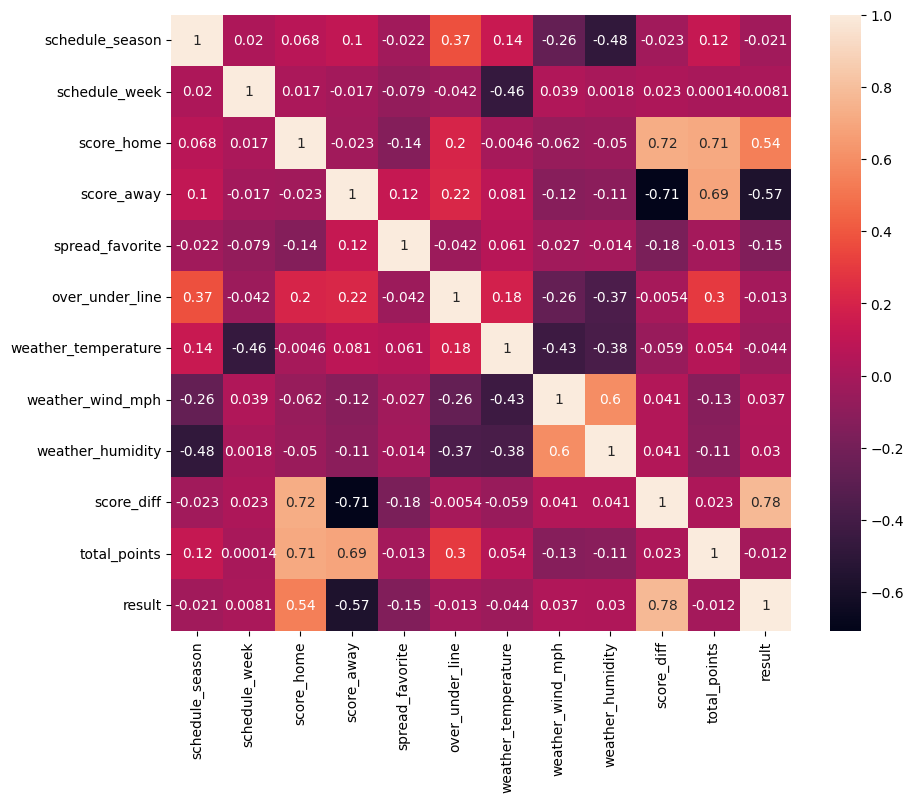

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(scores.iloc[:, :13].corr(), annot=True);

## 5. Preparacion del modelo

In [32]:
print(scores['result'].value_counts())

#observamos un target balancedo, no hay que tratarlo
print((scores['result'].value_counts() / len(scores['result']) * 100).map(lambda x: f"{x:.2f}%"))

1    5922
0    4395
Name: result, dtype: int64
1    57.40%
0    42.60%
Name: result, dtype: object


In [33]:
print(scores.head(n=13))

   schedule_date  schedule_season  schedule_week  score_home  score_away  \
0       9/7/1980              -20              1          17           7   
1       9/7/1980              -20              1          12          17   
2       9/7/1980              -20              1          12           6   
3       9/7/1980              -20              1          14          27   
4       9/7/1980              -20              1          20          41   
5       9/7/1980              -20              1          24          23   
6       9/7/1980              -20              1          34          17   
7       9/7/1980              -20              1          23          26   
8       9/7/1980              -20              1          14          17   
9       9/7/1980              -20              1          27           6   
10      9/7/1980              -20              1          31          17   
11      9/7/1980              -20              1          13          34   
12      9/7/

In [34]:
X = scores.drop(["schedule_date",
                 "score_home",
                 "score_away",
                 "score_diff",
                 "schedule_season",
                 "schedule_week",
                 "result",
                 "weather_wind_mph",
                 ],
                axis=1
)
y = scores['result'].copy()
X.shape

(10317, 193)

In [35]:
X

spread_favorite  over_under_line  weather_temperature  \
0                 -3.0             35.0                 64.0   
1                 -1.0             34.0                 72.0   
2                 -6.0             35.0                 65.0   
3                 -3.0             42.0                 82.0   
4                 -9.0             38.0                 66.0   
...                ...              ...                  ...   
10312            -17.0             43.0                 64.0   
10313             -2.5             40.0                 64.0   
10314            -14.5             40.0                 64.0   
10315             -4.5             43.0                 64.0   
10316             -7.5             41.0                 64.0   

       weather_humidity  total_points  stadium_AT&T Stadium  \
0                  66.0            24                     0   
1                  81.0            29                     0   
2                  77.0            18                     0   
3                  58.0            41                     0   
4                  70.0            61                     0   
...                 ...           ...                   ...   
10312               0.0            38                     0   
10313               0.0            42                     0   
10314               0.0            51                     0   
10315               0.0            35                     0   
10316               0.0            32                     0   

       stadium_Acrisure Stadium  stadium_Alamo Dome  \
0                             0                   0   
1                             0                   0   
2                             0                   0   
3                             0                   0   
4                             0                   0   
...                         ...                 ...   
10312                         0                   0   
10313                         1                   0   
10314                         0                   0   
10315                         0                   0   
10316                         0                   0   

       stadium_Allegiant Stadium  stadium_Allianz Arena  ...  \
0                              0                      0  ...   
1                              0                      0  ...   
2                              0                      0  ...   
3                              0                      0  ...   
4                              0                      0  ...   
...                          ...                    ...  ...   
10312                          0                      0  ...   
10313                          0                      0  ...   
10314                          0                      0  ...   
10315                          0                      0  ...   
10316                          0                      0  ...   

       team_favorite_id_NYG  team_favorite_id_NYJ  team_favorite_id_PHI  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
10312                     0                     0                     1   
10313                     0                     0                     0   
10314                     0                     0                     0   
10315                     0                     0                     0   
10316                     0                     0                     0   

       team_favorite_id_PICK  team_favorite_id_PIT  team_favorite_id_SEA  \
0                          0                     0                     0  

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [37]:
scaler = StandardScaler()

In [38]:
scaler_X_train = scaler.fit_transform(X_train)

In [39]:
scaler_X_test = scaler.transform(X_test)

## 6. Modelos de clasificación y evaluación:

#### 6.1 Logistic Regression

In [40]:
log_model = LogisticRegression()

In [41]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [42]:
pred_lg = log_model.predict(X_test)

In [43]:
print("ROC:",roc_auc_score(y_test, pred_lg)*100)
print("Accuracy:",accuracy_score(y_test, pred_lg)*100)
print("Precision:",precision_score(y_test, pred_lg)*100)
print("F1 Score:",f1_score(y_test, pred_lg)*100)
print("Recall:",recall_score(y_test, pred_lg)*100)

ROC: 55.5155085773696
Accuracy: 58.720930232558146
Precision: 61.622111463525144
F1 Score: 68.03401700850425
Recall: 75.93523171412619


#### 6.2 Decision Tree Classifier

In [44]:
dt = DecisionTreeClassifier()

In [45]:
dt.fit(scaler_X_train,y_train)

DecisionTreeClassifier()

In [46]:
pred_dt = dt.predict(scaler_X_test)

In [47]:
print("ROC:",roc_auc_score(y_test, pred_dt)*100)
print("Accuracy:",accuracy_score(y_test, pred_dt)*100)
print("Precision:",precision_score(y_test, pred_dt)*100)
print("F1 Score:",f1_score(y_test, pred_dt)*100)
print("Recall:",recall_score(y_test, pred_dt)*100)

ROC: 54.66528042511407
Accuracy: 55.62015503875969
Precision: 61.853325753268905
F1 Score: 61.29577464788733
Recall: 60.74818537130094


#### 6.3 Random Forest

In [48]:
r_forest = RandomForestClassifier()

In [49]:
r_forest.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
pred_r_forest = r_forest.predict(X_test)

In [51]:
print("ROC:",roc_auc_score(y_test, pred_r_forest)*100)
print("Accuracy:",accuracy_score(y_test, pred_r_forest)*100)
print("Precision:",precision_score(y_test, pred_r_forest)*100)
print("F1 Score:",f1_score(y_test, pred_r_forest)*100)
print("Recall:",recall_score(y_test, pred_r_forest)*100)

ROC: 59.50557384624271
Accuracy: 61.82170542635659
Precision: 64.84641638225256
F1 Score: 69.23477355543987
Recall: 74.26018983807928


#### 6.4 KNN

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(scaler_X_train,y_train)

KNeighborsClassifier()

In [54]:
pred_knn = knn.predict(scaler_X_test)

In [55]:
print("ROC:",roc_auc_score(y_test, pred_knn)*100)
print("Accuracy:",accuracy_score(y_test, pred_knn)*100)
print("Precision:",precision_score(y_test, pred_knn)*100)
print("F1 Score:",f1_score(y_test, pred_knn)*100)
print("Recall:",recall_score(y_test, pred_knn)*100)

ROC: 58.41198328808795
Accuracy: 60.91731266149871
Precision: 63.946231397023524
F1 Score: 68.76613319566339
Recall: 74.37185929648241


#### 6.5 SVM

In [56]:
svm = SVC()

In [57]:
svm.fit(scaler_X_train,y_train)

SVC()

In [58]:
pred_svm = svm.predict(scaler_X_test)

In [59]:
print("ROC:",roc_auc_score(y_test, pred_svm)*100)
print("Accuracy:",accuracy_score(y_test, pred_svm)*100)
print("Precision:",precision_score(y_test, pred_svm)*100)
print("F1 Score:",f1_score(y_test, pred_svm)*100)
print("Recall:",recall_score(y_test, pred_svm)*100)

ROC: 61.44958509020198
Accuracy: 64.69638242894057
Precision: 65.55258467023172
F1 Score: 72.91201982651798
Recall: 82.13288665549973


#### 6.6 GaussianNB

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [61]:
gnb.fit(X_train, y_train)

GaussianNB()

In [62]:
pred_gnb = gnb.predict(X_test)

In [63]:
print("ROC:",roc_auc_score(y_test, pred_gnb)*100)
print("Accuracy:",accuracy_score(y_test, pred_gnb)*100)
print("Precision:",precision_score(y_test, pred_gnb)*100)
print("F1 Score:",f1_score(y_test, pred_gnb)*100)
print("Recall:",recall_score(y_test, pred_gnb)*100)

ROC: 55.766187258129726
Accuracy: 58.91472868217055
Precision: 61.811561219845245
F1 Score: 68.10431293881646
Recall: 75.82356225572306


In [64]:
# model = XGBClassifier()

# # Define los valores que deseas probar para cada hiperparámetro en un diccionario
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 1, 5]
# }

# # Realiza la búsqueda en cuadrícula utilizando validación cruzada para encontrar la combinación óptima de hiperparámetros
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="precision", cv=5)
# grid_search.fit(X_train, y_train)

# # Imprime los mejores hiperparámetros encontrados
# print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# # Haz predicciones en los datos de prueba utilizando el modelo con los mejores hiperparámetros
# predictions = grid_search.best_estimator_.predict(X_test)


In [65]:
# print("ROC:",roc_auc_score(y_test, predictions)*100)
# print("Accuracy:",accuracy_score(y_test, predictions)*100)
# print("Precision:",precision_score(y_test, predictions)*100)
# print("F1 Score:",f1_score(y_test, predictions)*100)
# print("Recall:",recall_score(y_test, predictions)*100)

#### 6.7 XGBoost

In [66]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, subsample=0.8, colsample_bytree= 0.9, gamma=5)

In [67]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
pred_xgb = xgb.predict(X_test)

In [69]:
print("ROC:",roc_auc_score(y_test, pred_xgb)*100)
print("Accuracy:",accuracy_score(y_test, pred_xgb)*100)
print("Precision:",precision_score(y_test, pred_xgb)*100)
print("F1 Score:",f1_score(y_test, pred_xgb)*100)
print("Recall:",recall_score(y_test, pred_xgb)*100)

ROC: 56.67205760603785
Accuracy: 61.46640826873385
Precision: 61.8368962787015
F1 Score: 72.36506833449154
Recall: 87.21384701284198


#### 6.8 CatBoost

In [37]:
# Aplicar SMOTE al conjunto de entrenamiento para balancear la target
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [38]:
cat = CatBoostClassifier(depth=6, iterations=200,learning_rate=0.01,)

In [39]:
cat.fit(X_train_balanced, y_train_balanced)

0:	learn: 0.6927834	total: 58.5ms	remaining: 11.6s
1:	learn: 0.6924739	total: 61.2ms	remaining: 6.06s
2:	learn: 0.6921027	total: 63.7ms	remaining: 4.18s
3:	learn: 0.6916369	total: 66.2ms	remaining: 3.24s
4:	learn: 0.6912834	total: 69ms	remaining: 2.69s
5:	learn: 0.6908455	total: 71.2ms	remaining: 2.3s
6:	learn: 0.6905594	total: 73.6ms	remaining: 2.03s
7:	learn: 0.6902810	total: 76ms	remaining: 1.82s
8:	learn: 0.6899518	total: 78.8ms	remaining: 1.67s
9:	learn: 0.6895790	total: 81.4ms	remaining: 1.55s
10:	learn: 0.6892883	total: 83.7ms	remaining: 1.44s
11:	learn: 0.6888958	total: 85.9ms	remaining: 1.34s
12:	learn: 0.6885605	total: 88.4ms	remaining: 1.27s
13:	learn: 0.6882484	total: 90.9ms	remaining: 1.21s
14:	learn: 0.6879370	total: 93.3ms	remaining: 1.15s
15:	learn: 0.6876526	total: 95.6ms	remaining: 1.1s
16:	learn: 0.6874056	total: 97.7ms	remaining: 1.05s
17:	learn: 0.6870773	total: 100ms	remaining: 1.01s
18:	learn: 0.6868186	total: 103ms	remaining: 978ms
19:	learn: 0.6864938	total: 10

In [60]:
pred_cat = cat.predict(X_test)

In [61]:
print("ROC:",roc_auc_score(y_test, pred_cat)*100)
print("Accuracy:",accuracy_score(y_test, pred_cat)*100)
print("Precision:",precision_score(y_test, pred_cat)*100)
print("F1 Score:",f1_score(y_test, pred_cat)*100)
print("Recall:",recall_score(y_test, pred_cat)*100)

ROC: 58.46146441017348
Accuracy: 56.42764857881137
Precision: 68.60269360269359
F1 Score: 54.71634776770728
Recall: 45.505304299274144


#### 6.9 Gradient Boosting

In [74]:
gbc = GradientBoostingClassifier()

In [75]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [76]:
pred_gbc = gbc.predict(X_test)

In [77]:
print("ROC:",roc_auc_score(y_test, pred_gbc)*100)
print("Accuracy:",accuracy_score(y_test, pred_gbc)*100)
print("Precision:",precision_score(y_test, pred_gbc)*100)
print("F1 Score:",f1_score(y_test, pred_gbc)*100)
print("Recall:",recall_score(y_test, pred_gbc)*100)

ROC: 56.48972833516239
Accuracy: 61.111111111111114
Precision: 61.782416700120436
F1 Score: 71.88229799159271
Recall: 85.92964824120602


In [78]:
save_model(gbc,"model")

Model GradientBoostingClassifier saved


'model/GradientBoostingClassifier_1.pkl'

In [79]:
bg = BaggingClassifier()
bg.fit(X_train, y_train)
pred_bg = bg.predict(X_test)


print("ROC:",roc_auc_score(y_test, pred_bg)*100)
print("Accuracy:",accuracy_score(y_test, pred_bg)*100)
print("Precision:",precision_score(y_test, pred_bg)*100)
print("F1 Score:",f1_score(y_test, pred_bg)*100)
print("Recall:",recall_score(y_test, pred_bg)*100)

ROC: 56.880378906024376
Accuracy: 57.46124031007752
Precision: 63.97405660377359
F1 Score: 62.2311442500717
Recall: 60.580681183696264


# 7

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Crear un diccionario de modelos con sus nombres como claves y los clasificadores como valores
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(),
    "KNN": KNeighborsClassifier()
}

# Definir una lista para almacenar los resultados de cada modelo
results = []

# Entrenar y evaluar cada modelo con el conjunto de datos original
for model_name, model in models.items():
    if model_name in ["Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"]:
        # Escalar las características para los modelos que lo necesiten
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # Entrenar el modelo
        model.fit(X_train_scaled, y_train)
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test_scaled)
    else:
        # Entrenar el modelo
        model.fit(X_train, y_train)
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
    
    # Calcular las métricas precision, recall y accuracy del modelo en el conjunto de prueba
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Agregar el resultado a la lista de resultados
    results.append((model_name, precision, recall, accuracy))

# Crear un DataFrame para mostrar los resultados
models = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "Accuracy"])

In [34]:
# Aplicar SMOTE al conjunto de entrenamiento para balancear la target
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [81]:

# Aplicar SMOTE al conjunto de entrenamiento para balancear la target
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear un diccionario de modelos con sus nombres como claves y los clasificadores como valores
models_balanced = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(),
    "KNN": KNeighborsClassifier()
}

# Definir una lista para almacenar los resultados de cada modelo
results = []

# Entrenar y evaluar cada modelo con el conjunto de datos balanceado
for model_name, model in models_balanced.items():
    if model_name in ["Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"]:
        # Escalar las características para los modelos que lo necesiten
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)
        # Entrenar el modelo
        model.fit(X_train_scaled, y_train_balanced)
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test_scaled)
    else:
        # Entrenar el modelo
        model.fit(X_train_balanced, y_train_balanced)
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
    
    # Calcular las métricas precision, recall y accuracy del modelo en el conjunto de prueba
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Agregar el resultado a la lista de resultados
    results.append((model_name, precision, recall, accuracy))

# Crear un DataFrame para mostrar los resultados
models_balanced = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "Accuracy"])

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [35]:
models.sort_values(by="Precision", ascending=False)


Model  Precision    Recall  Accuracy
5             LightGBM   0.643110  0.769231  0.623062
6             CatBoost   0.642907  0.777684  0.625000
4              XGBoost   0.642429  0.724429  0.610950
0        Random Forest   0.639114  0.732037  0.609496
3    Gradient Boosting   0.634759  0.790363  0.619186
7                  KNN   0.614308  0.667794  0.569283
1  Logistic Regression   0.591279  0.859679  0.578973
2                  SVM   0.586100  0.955199  0.587694

In [38]:
models_balanced.sort_values(by="Precision", ascending=False)

Model  Precision    Recall  Accuracy
2                  SVM   0.682018  0.347292  0.528747
3    Gradient Boosting   0.670675  0.560581  0.586563
6             CatBoost   0.669390  0.686209  0.622416
5             LightGBM   0.666667  0.684534  0.619509
0        Random Forest   0.663191  0.710218  0.623708
4              XGBoost   0.657688  0.654383  0.603036
1  Logistic Regression   0.622824  0.719151  0.585594
7                  KNN   0.612527  0.469570  0.521318

Obtamos por quedarnos con el balanceado ya nos otorga una mejor performance

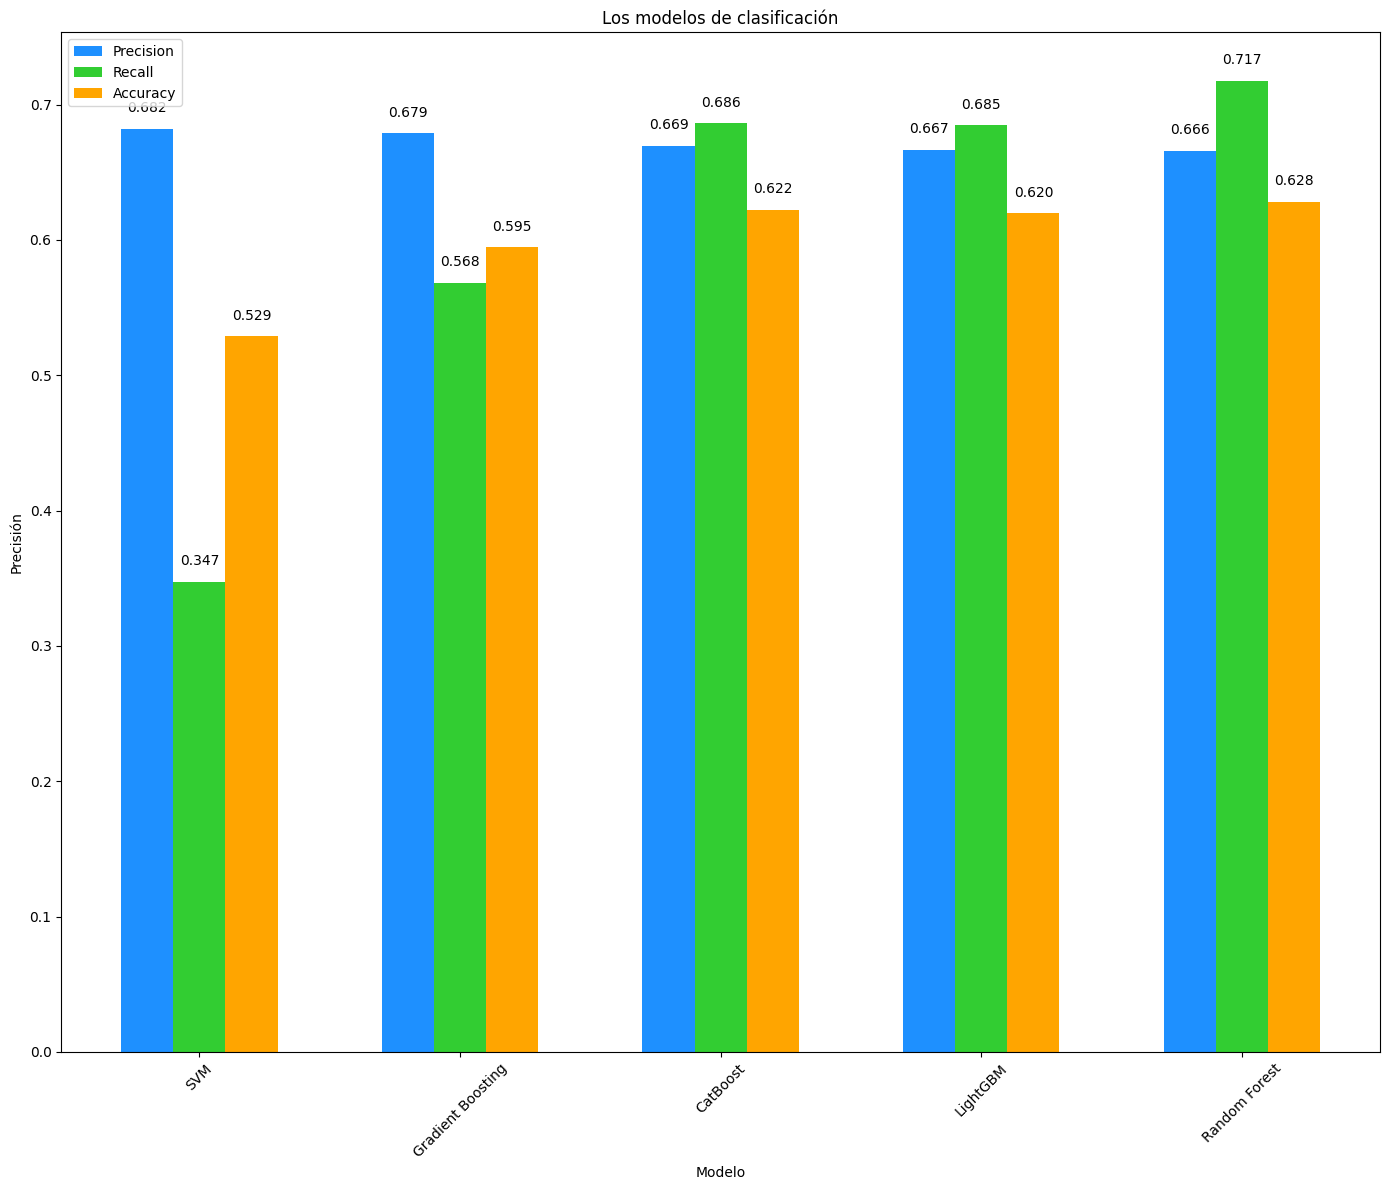

In [38]:

# Ordenar la tabla de resultados por precisión de mayor a menor
models_balanced_sorted = models_balanced.sort_values(by="Precision", ascending=False)

# Seleccionar los cuatro mejores modelos basados en precisión
top_5_models =models_balanced_sorted.head(5)

# Crear una gráfica de barras para visualizar las precisiones, recalls y exactitudes de los modelos
plt.figure(figsize=(14, 12))

models = top_5_models["Model"]
precision_scores = top_5_models["Precision"]
recall_scores = top_5_models["Recall"]
accuracy_scores = top_5_models["Accuracy"]

# Coordenadas para la posición de las barras
x = np.arange(len(models))

# Ancho de las barras
width = 0.2

# Crear las barras para cada métrica
plt.bar(x - width, precision_scores, width, label='Precision', color='dodgerblue')
plt.bar(x, recall_scores, width, label='Recall', color='limegreen')
plt.bar(x + width, accuracy_scores, width, label='Accuracy', color='orange')

plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Los 5 mejores modelos de clasificación')
plt.xticks(x, models, rotation=45)
plt.legend()

# Mostrar el valor de cada barra en la gráfica
for i, v in enumerate(precision_scores):
    plt.text(i - width, v + 0.01, f'{v:.3f}', color='black', ha='center', va='bottom')
    
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', color='black', ha='center', va='bottom')
    
for i, v in enumerate(accuracy_scores):
    plt.text(i + width, v + 0.01, f'{v:.3f}', color='black', ha='center', va='bottom')

plt.tight_layout();


In [40]:
# Crear un diccionario de modelos con sus nombres como claves y los clasificadores como valores
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}

# Definir una lista para almacenar los resultados de cada modelo
results = []

# Entrenar y evaluar cada modelo con el conjunto de datos original
for model_name, model in models.items():
    if model_name in ["Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"]:
        # Escalar las características para los modelos que lo necesiten
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # Entrenar el modelo
        model.fit(X_train_scaled, y_train)
        # Obtener el "feature importance"
        feature_importance = model.feature_importances_
    else:
        # Entrenar el modelo
        model.fit(X_train, y_train)
        # Obtener el "feature importance" si es aplicable
        try:
            feature_importance = model.feature_importances_
        except AttributeError:
            feature_importance = None

    # Crear un DataFrame para almacenar el "feature importance" junto con el nombre de las características
    feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
    feature_importance_df["Model"] = model_name

    # Agregar el DataFrame del modelo a la lista de resultados
    results.append(feature_importance_df)

# Combinar todos los DataFrames en uno solo
result_table = pd.concat(results)

# Crear una tabla cruzada con el "feature importance" para cada modelo y cada característica
features = pd.crosstab(result_table["Feature"], result_table["Model"], values=result_table["Importance"],
                        aggfunc='sum', margins=True, margins_name="Total")

# Ordenar las características según su "feature importance" de mayor a menor
features = features.sort_values(by="Total", ascending=False)

# Mostrar la tabla cruzada con el "feature importance" para cada modelo y cada característica
features.head(10)

Learning rate set to 0.023964
0:	learn: 0.6920257	total: 2.56ms	remaining: 2.56s
1:	learn: 0.6909688	total: 4.34ms	remaining: 2.16s
2:	learn: 0.6900930	total: 6.69ms	remaining: 2.22s
3:	learn: 0.6888808	total: 8.48ms	remaining: 2.11s
4:	learn: 0.6878773	total: 19.6ms	remaining: 3.91s
5:	learn: 0.6870025	total: 21.9ms	remaining: 3.62s
6:	learn: 0.6858829	total: 24ms	remaining: 3.4s
7:	learn: 0.6850045	total: 25.6ms	remaining: 3.17s
8:	learn: 0.6841472	total: 27.5ms	remaining: 3.03s
9:	learn: 0.6832414	total: 29.4ms	remaining: 2.91s
10:	learn: 0.6825820	total: 31.2ms	remaining: 2.8s
11:	learn: 0.6817794	total: 33ms	remaining: 2.72s
12:	learn: 0.6810690	total: 34.6ms	remaining: 2.62s
13:	learn: 0.6804289	total: 36.4ms	remaining: 2.56s
14:	learn: 0.6796656	total: 38.2ms	remaining: 2.51s
15:	learn: 0.6790773	total: 40ms	remaining: 2.46s
16:	learn: 0.6784435	total: 41.8ms	remaining: 2.42s
17:	learn: 0.6775749	total: 44.1ms	remaining: 2.41s
18:	learn: 0.6770533	total: 46.1ms	remaining: 2.38s


Model                          CatBoost  Gradient Boosting  LightGBM  \
Feature                                                                
Total                        100.000000           1.000000    3000.0   
total_points                   9.869606           0.046473     465.0   
spread_favorite               14.756440           0.232603     430.0   
over_under_line                8.962497           0.051031     396.0   
weather_temperature            7.098743           0.049086     324.0   
weather_humidity               7.293580           0.030137     320.0   
team_favorite_id_LAR           0.801656           0.010833      25.0   
team_away_DET                  0.940102           0.021780      24.0   
team_favorite_id_NE            1.294820           0.024419      20.0   
stadium_FirstEnergy Stadium    0.525694           0.014326      20.0   

Model                        Random Forest   XGBoost        Total  
Feature                                                            
Total                             1.000000  1.000000  3103.000000  
total_points                      0.110016  0.004327   475.030421  
spread_favorite                   0.103626  0.006422   445.099091  
over_under_line                   0.103088  0.004260   405.120875  
weather_temperature               0.077713  0.004195   331.229737  
weather_humidity                  0.069142  0.004532   327.397392  
team_favorite_id_LAR              0.004950  0.012467    25.829905  
team_away_DET                     0.004916  0.010355    24.977154  
team_favorite_id_NE               0.004887  0.011442    21.335568  
stadium_FirstEnergy Stadium       0.002762  0.008023    20.550805

Procedemos a un crossvalidation sobre los mejores 5 modelos

In [ ]:
# Define tus modelos
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()
lightgbm_model = lgb.LGBMClassifier()
catboost_model = CatBoostClassifier()
xgboost_model = xgb.XGBClassifier()

# Lista de modelos
models = [svm_model, gradient_boosting_model, lightgbm_model, catboost_model, xgboost_model]

# Lista de nombres de los modelos
model_names = ['SVM', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'XGBoost']

# Lista para almacenar los resultados de la validación cruzada (precision)
precision_scores = []

# Realizar la validación cruzada para cada modelo y obtener la precisión
for model in models:
    # Realizar la validación cruzada y obtener las métricas de precisión (por defecto, utiliza 5-fold)
    precision_scores.append(cross_val_score(model, X_train_balanced, y_train_balanced, cv=10, scoring='precision').mean())

# Crear un DataFrame para mostrar los resultados de la precisión
results_cv = pd.DataFrame({'Model': model_names, 'Precision': precision_scores, "Accuracy": acc})
results_cv.sort_values(by="Precision", ascending=False)


In [1]:
X_train_balanced

NameError: name 'X_train_balanced' is not defined

In [38]:

# Definir los modelos
svm_model = SVC()
gradient_boosting_model = GradientBoostingClassifier()
lightgbm_model = lgb.LGBMClassifier()
catboost_model = CatBoostClassifier()
xgboost_model = xgb.XGBClassifier()

# Lista de modelos
models = [svm_model, gradient_boosting_model, lightgbm_model, catboost_model, xgboost_model]

# Lista de nombres de los modelos
model_names = ['SVM', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'XGBoost']

# Lista para almacenar los resultados de la validación cruzada
precision_scores = []
accuracy_scores = []
recall_scores = []

# Realizar la validación cruzada para cada modelo y obtener las métricas
for model in models:
    # Realizar la validación cruzada y obtener las métricas
    precision_scores.append(cross_val_score(model, X_train_balanced, y_train_balanced, cv=10, scoring='precision').mean())
    accuracy_scores.append(cross_val_score(model, X_train_balanced, y_train_balanced, cv=10, scoring='accuracy').mean())
    recall_scores.append(cross_val_score(model, X_train_balanced, y_train_balanced, cv=10, scoring='recall').mean())

# Crear un DataFrame para mostrar los resultados
results_cv = pd.DataFrame({'Model': model_names, 'Precision': precision_scores, 'Accuracy': accuracy_scores, 'Recall': recall_scores})
results_cv.sort_values(by="Precision", ascending=False)



Learning rate set to 0.024264
0:	learn: 0.6922431	total: 3.27ms	remaining: 3.27s
1:	learn: 0.6914690	total: 5.93ms	remaining: 2.96s
2:	learn: 0.6906231	total: 7.87ms	remaining: 2.61s
3:	learn: 0.6897562	total: 9.85ms	remaining: 2.45s
4:	learn: 0.6888987	total: 11.7ms	remaining: 2.34s
5:	learn: 0.6880100	total: 13.7ms	remaining: 2.27s
6:	learn: 0.6873294	total: 15.5ms	remaining: 2.19s
7:	learn: 0.6867106	total: 18.1ms	remaining: 2.24s
8:	learn: 0.6860592	total: 20.2ms	remaining: 2.23s
9:	learn: 0.6853357	total: 22.7ms	remaining: 2.24s
10:	learn: 0.6844633	total: 25.1ms	remaining: 2.25s
11:	learn: 0.6836470	total: 27.1ms	remaining: 2.23s
12:	learn: 0.6830306	total: 29.6ms	remaining: 2.25s
13:	learn: 0.6824455	total: 32.2ms	remaining: 2.27s
14:	learn: 0.6818929	total: 34.4ms	remaining: 2.26s
15:	learn: 0.6812812	total: 36.7ms	remaining: 2.25s
16:	learn: 0.6806642	total: 39ms	remaining: 2.25s
17:	learn: 0.6798846	total: 41.2ms	remaining: 2.25s
18:	learn: 0.6793721	total: 43.4ms	remaining: 

Model  Precision  Accuracy    Recall
2           LightGBM   0.684010  0.658690  0.681190
3           CatBoost   0.681763  0.660018  0.680698
4            XGBoost   0.681597  0.648521  0.654075
1  Gradient Boosting   0.658166  0.630364  0.572018
0                SVM   0.619270  0.562215  0.324862

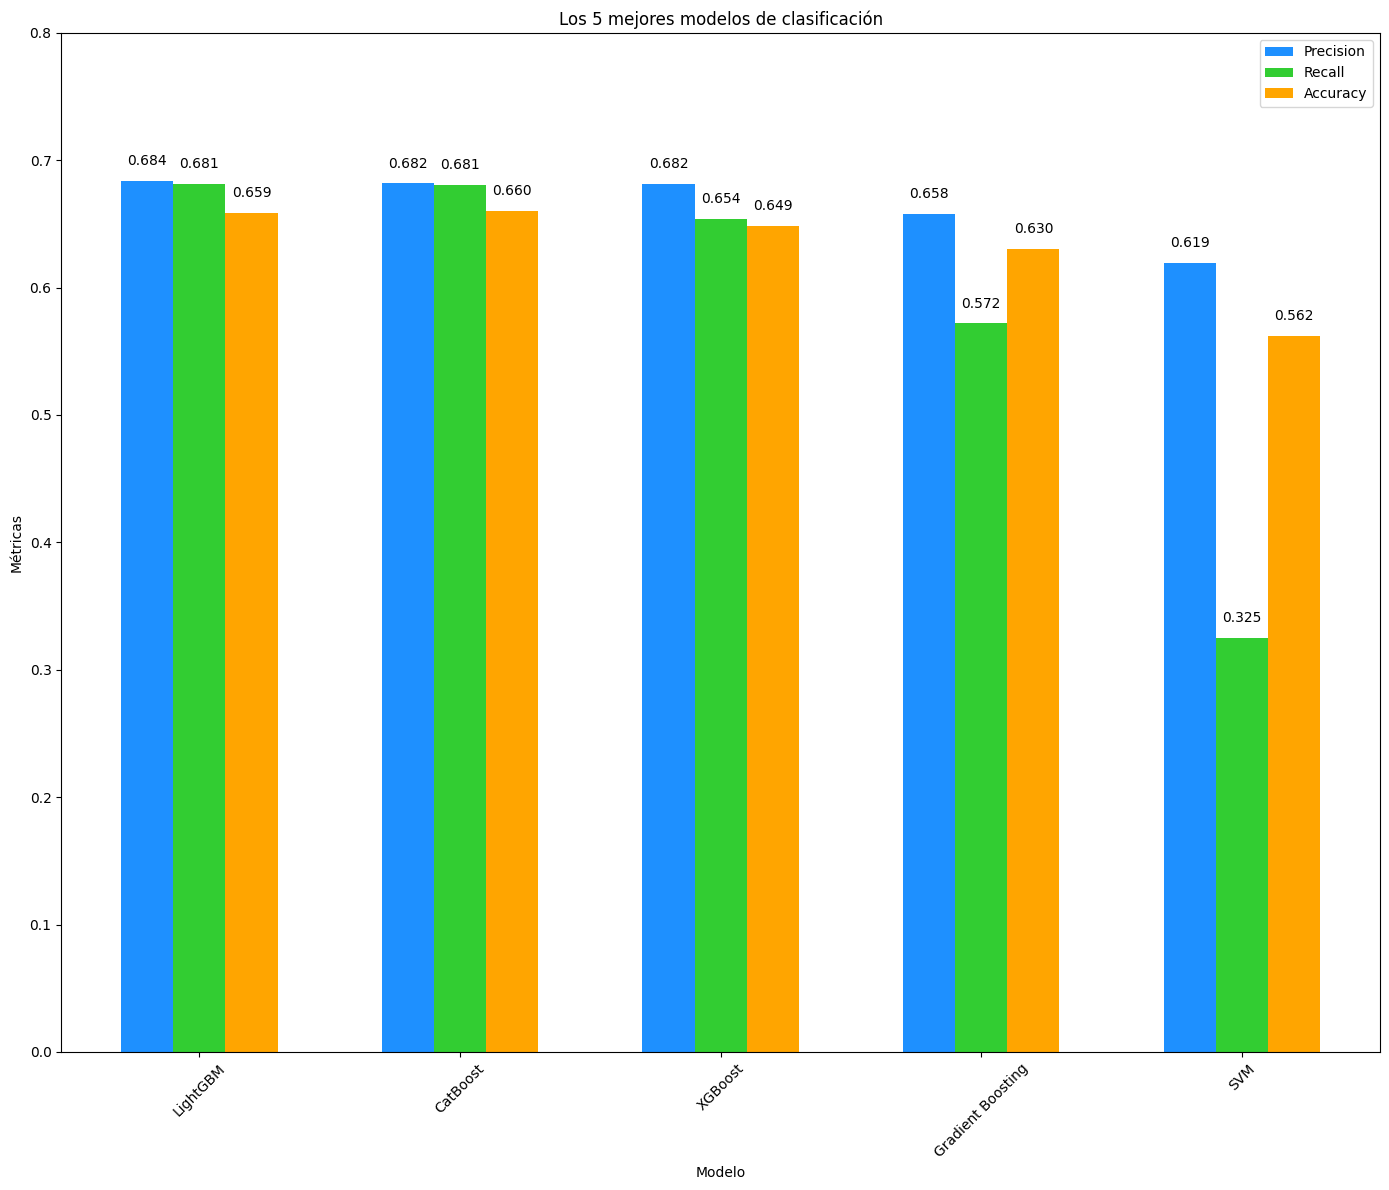

In [42]:

# Ordenar la tabla de resultados por precisión de mayor a menor
models_balanced_sorted = results_cv.sort_values(by="Precision", ascending=False)

# Seleccionar los cinco mejores modelos basados en precisión
top_5_models = models_balanced_sorted.head(5)

# Crear una gráfica de barras para visualizar las precisiones, recalls y exactitudes de los modelos
plt.figure(figsize=(14, 12))

models = top_5_models["Model"]
precision_scores = top_5_models["Precision"]
recall_scores = top_5_models["Recall"]
accuracy_scores = top_5_models["Accuracy"]

# Coordenadas para la posición de las barras
x = np.arange(len(models))

# Ancho de las barras
width = 0.2

# Crear las barras para cada métrica
plt.bar(x - width, precision_scores, width, label='Precision', color='dodgerblue')
plt.bar(x, recall_scores, width, label='Recall', color='limegreen')
plt.bar(x + width, accuracy_scores, width, label='Accuracy', color='orange')

plt.xlabel('Modelo')
plt.ylabel('Métricas')
plt.title('Los 5 mejores modelos de clasificación')
plt.xticks(x, models, rotation=45)
plt.legend()

# Mostrar el valor de cada barra en la gráfica
for i, v in enumerate(precision_scores):
    plt.text(i - width, v + 0.01, f'{v:.3f}', color='black', ha='center', va='bottom')
    
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', color='black', ha='center', va='bottom')
    
for i, v in enumerate(accuracy_scores):
    plt.text(i + width, v + 0.01, f'{v:.3f}', color='black', ha='center', va='bottom')

plt.ylim(0, 0.8)
plt.tight_layout();


In [40]:
# Definir el modelo CatBoost con sus hiperparámetros
catboost_model = CatBoostClassifier()

# Realizar la validación cruzada y obtener las métricas de precisión (por defecto, utiliza 5-fold)
precision_scores = cross_val_score(catboost_model, X_train_balanced, y_train_balanced, cv=10, scoring='precision')

# Calcular la precisión promedio obtenida durante la validación cruzada
mean_precision = precision_scores.mean()

print("Precisión promedio con validación cruzada:", mean_precision)

# Entrenar el modelo CatBoost en todo el conjunto de datos de entrenamiento
catboost_model.fit(X_train_balanced, y_train_balanced)

# Guardar el modelo entrenado con validación cruzada en un archivo pickle
with open('catboost_model_cv.pkl', 'wb') as file:
    pickle.dump(catboost_model, file)



Learning rate set to 0.025731
0:	learn: 0.6922492	total: 4.32ms	remaining: 4.32s
1:	learn: 0.6915323	total: 7.56ms	remaining: 3.77s
2:	learn: 0.6897976	total: 11.9ms	remaining: 3.97s
3:	learn: 0.6876845	total: 16ms	remaining: 3.97s
4:	learn: 0.6862288	total: 19ms	remaining: 3.78s
5:	learn: 0.6849637	total: 21ms	remaining: 3.47s
6:	learn: 0.6829731	total: 23.8ms	remaining: 3.38s
7:	learn: 0.6816698	total: 26.7ms	remaining: 3.31s
8:	learn: 0.6803008	total: 28.5ms	remaining: 3.13s
9:	learn: 0.6796826	total: 31.4ms	remaining: 3.11s
10:	learn: 0.6779126	total: 34.1ms	remaining: 3.06s
11:	learn: 0.6766521	total: 36.9ms	remaining: 3.04s
12:	learn: 0.6755138	total: 39.2ms	remaining: 2.97s
13:	learn: 0.6744030	total: 41.7ms	remaining: 2.94s
14:	learn: 0.6731055	total: 44.6ms	remaining: 2.93s
15:	learn: 0.6725163	total: 47.2ms	remaining: 2.9s
16:	learn: 0.6709400	total: 49.5ms	remaining: 2.86s
17:	learn: 0.6704109	total: 53.5ms	remaining: 2.92s
18:	learn: 0.6694128	total: 55.6ms	remaining: 2.87s

Nos quedaremos con los 3 modelos para proceder a hacerle un GridSearch

In [ ]:
print("Precisión promedio con validación cruzada:", mean_precision)

In [41]:
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [36]:
# Definir los modelos y los rangos de hiperparámetros para la búsqueda en la cuadrícula
models = {
    "CatBoost": (CatBoostClassifier(), {
        'depth': [4, 6, 8],
        'l2_leaf_reg': [0.1, 1, 10],
        'iterations': [100, 200, 300],
        'border_count': [32, 64, 128],
    }),
    "XGBoost": (xgb.XGBClassifier(), {
        'max_depth': [4, 6, 8],
        'min_child_weight': [1, 3, 5],
        'gamma': [0.0, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }),
    "LightGBM": (lgb.LGBMClassifier(), {
        'max_depth': [4, 6, 8],
        'min_child_samples': [10, 20, 30],
        'reg_alpha': [0.0, 0.1, 0.5],
        'reg_lambda': [0.0, 0.1, 0.5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    })
}

# Realizar el GridSearch con validación cruzada y métrica de precisión para cada modelo
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision')
    grid_search.fit(X_train_balanced, y_train_balanced)
    best_models[model_name] = grid_search.best_estimator_

# Evaluar los mejores modelos en el conjunto de prueba
results = []
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    results.append((model_name, precision))

# Crear un DataFrame para mostrar los resultados
result_table = pd.DataFrame(results, columns=["Model", "Precision"])

# Mostrar la tabla de resultados ordenada por precisión de mayor a menor
result_table.sort_values(by="Precision", ascending=False, inplace=True)
result_table


0:	learn: 0.6921799	total: 10.8ms	remaining: 1.07s
1:	learn: 0.6914446	total: 12.7ms	remaining: 621ms
2:	learn: 0.6905907	total: 14.1ms	remaining: 456ms
3:	learn: 0.6896739	total: 15.4ms	remaining: 370ms
4:	learn: 0.6886338	total: 16.3ms	remaining: 309ms
5:	learn: 0.6878173	total: 17.6ms	remaining: 275ms
6:	learn: 0.6871802	total: 18.8ms	remaining: 250ms
7:	learn: 0.6865012	total: 19.8ms	remaining: 227ms
8:	learn: 0.6852445	total: 20.8ms	remaining: 210ms
9:	learn: 0.6840630	total: 21.9ms	remaining: 197ms
10:	learn: 0.6835439	total: 22.9ms	remaining: 186ms
11:	learn: 0.6820257	total: 23.7ms	remaining: 174ms
12:	learn: 0.6807045	total: 24.5ms	remaining: 164ms
13:	learn: 0.6792015	total: 25.7ms	remaining: 158ms
14:	learn: 0.6786021	total: 26.8ms	remaining: 152ms
15:	learn: 0.6780246	total: 27.8ms	remaining: 146ms
16:	learn: 0.6765033	total: 28.9ms	remaining: 141ms
17:	learn: 0.6754812	total: 30.1ms	remaining: 137ms
18:	learn: 0.6749907	total: 31.3ms	remaining: 134ms
19:	learn: 0.6744199	t

Model  Precision
0  CatBoost   0.663621
1   XGBoost   0.644588

In [ ]:
# Definir el modelo CatBoost con sus hiperparámetros
catboost_model = CatBoostClassifier(depth=6, iterations=200,learning_rate=0.01,)
precision_scores = cross_val_score(catboost_model, X_train_balanced, y_train_balanced, cv=10, scoring='precision')

# Calcular la precisión promedio obtenida durante la validación cruzada
mean_precision = precision_scores.mean()
catboost_model.fit(X_train_balanced, y_train_balanced)

# Guardar el modelo entrenado con validación cruzada en un archivo pickle
# with open('catboost_model_cv.pkl', 'wb') as file:
#     pickle.dump(catboost_model, file)
print("Precisión promedio con validación cruzada:", mean_precision)

## 7. SELECCIÓN DE MODELOS